<a href="https://colab.research.google.com/github/NikoKaramitos/Vision/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import libraries:

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

### Load and PreProcess MNIST Dataset

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=32, shuffle=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=32, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 145256867.90it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 31802492.47it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 36147159.28it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3807060.11it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



### Load and PreProcess CIFAR-10 Dataset

In [4]:
# CIFAR-10 Transform
transform_cifar = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

# Loading the CIFAR-10 datasets
trainset_cifar = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_cifar)
trainloader_cifar = DataLoader(trainset_cifar, batch_size=32, shuffle=True)

testset_cifar = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_cifar)
testloader_cifar = DataLoader(testset_cifar, batch_size=32, shuffle=False)

# CIFAR-10 classes
classes_cifar = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


100%|██████████| 170498071/170498071 [00:03<00:00, 49425102.80it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


#Part 1: Neural Networks

### Define Simple Neural Network:

In [5]:
class SimpleNN(nn.Module):
  def __init__(self):
    super(SimpleNN, self).__init__()
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(28*28, 15)   # input layer
    self.fc2 = nn.Linear(15, 15)      # hidden layer
    self.fc3 = nn.Linear(15, 10)      # output layer

  def forward(self, x):
    x = self.flatten(x)               # flatten image
    x = self.fc1(x)
    x = self.fc2(x)
    x = self.fc3(x)
    return x

### Simple Neural Network with ReLU Activation

In [6]:
class ModifiedSNN(nn.Module):
  def __init__(self):
    super(ModifiedSNN, self).__init__()
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(28*28, 15)   # input layer
    self.fc2 = nn.Linear(15, 15)      # hidden layer
    self.fc3 = nn.Linear(15, 10)      # output layer

  def forward(self, x):
    x = self.flatten(x)               # flatten image
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

### Deep NN: Redefine NN with More Layers and Neurons

In [7]:
class DeepNN(nn.Module):
  # define a deeper network with more than 4 layers and each layer having more than 200 neurons

  def __init__(self):
    super(DeepNN, self).__init__()
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(28*28, 300)
    self.fc2 = nn.Linear(300, 300)
    self.fc3 = nn.Linear(300, 300)
    self.fc4 = nn.Linear(300, 300)
    self.fc5 = nn.Linear(300, 10)

  def forward(self, x):
    x = self.flatten(x)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.relu(self.fc4(x))
    x = self.fc5(x)
    return x

# Part 2: Convolutional Neural Network

### Define the CNN Model

In [18]:
class BasicCNN(nn.Module):
  # define the CNN with 2 Conv2d layers and 2 max pooling layers, followed by 2 fully connected layers

  def __init__(self):
    super(BasicCNN, self).__init__()
    self.conv1 = nn.Conv2d(3, 10, kernel_size=3)
    self.conv2 = nn.Conv2d(10, 10, kernel_size=3)
    self.fc1 = nn.Linear(10*6*6, 50)
    self.fc2 = nn.Linear(50, 10)

  def forward(self, x):
    x = F.relu(F.max_pool2d(self.conv1(x), 2))
    x = F.relu(F.max_pool2d(self.conv2(x), 2))
    x = x.view(-1, 10*6*6)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

### Modify CNN to have more filterns in Conv2d Layers

In [19]:
class ModifiedCNN(nn.Module):
  # Redifine CNN with increased filters in Conv2d layers

  def __init__(self):
    super(ModifiedCNN, self).__init__()
    self.conv1 = nn.Conv2d(3, 20, kernel_size=3)
    self.conv2 = nn.Conv2d(20, 40, kernel_size=3)
    self.fc1 = nn.Linear(40*6*6, 100)
    self.fc2 = nn.Linear(100, 10)

  def forward(self, x):
    x = F.relu(F.max_pool2d(self.conv1(x), 2))
    x = F.relu(F.max_pool2d(self.conv2(x), 2))
    x = x.view(-1, 40*6*6)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x


### Training and Evaluation Functions

### Run Training and Evaluation

In [11]:
# Define training function
def train_model(model, trainloader, criterion, optimizer, epochs=5):

  model.train()
  train_loss = []

  for epoch in range(epochs):

    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):

      inputs, labels = data
      optimizer.zero_grad()
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
      running_loss += loss.item()

    epoch_loss = running_loss / len(trainloader)
    train_loss.append(epoch_loss)
    print(f'Epoch {epoch+1}, Loss: {epoch_loss}')

  return train_loss

# Define evaluation function
def evaluate_model(model, testloader):

  model.eval()
  correct = 0
  total = 0

  with torch.no_grad():
    for data in testloader:

      images, labels = data
      outputs = model(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

  accuracy = 100 * correct / total
  print(f'Accuracy of the network on the 1000 test images: {accuracy}%')

  return accuracy


### Simple Neural Network

#### Expiriment with Different Learning Rates

Training with learning rate: 0.1
Epoch 1, Loss: 0.5012062074760596
Epoch 2, Loss: 0.3839969881296158
Epoch 3, Loss: 0.3730176725635926
Epoch 4, Loss: 0.3663266164223353
Epoch 5, Loss: 0.35861277679403625
Accuracy of the network on the 1000 test images: 90.75%
Training with learning rate: 0.01
Epoch 1, Loss: 0.6283826710939407
Epoch 2, Loss: 0.33951265307068823
Epoch 3, Loss: 0.31504754603902496
Epoch 4, Loss: 0.30336338403026264
Epoch 5, Loss: 0.2977072271376848
Accuracy of the network on the 1000 test images: 91.57%
Training with learning rate: 0.001
Epoch 1, Loss: 1.7103515498161317
Epoch 2, Loss: 0.9217518643220266
Epoch 3, Loss: 0.633402236088117
Epoch 4, Loss: 0.5138343088229498
Epoch 5, Loss: 0.4533282197316488
Accuracy of the network on the 1000 test images: 88.14%


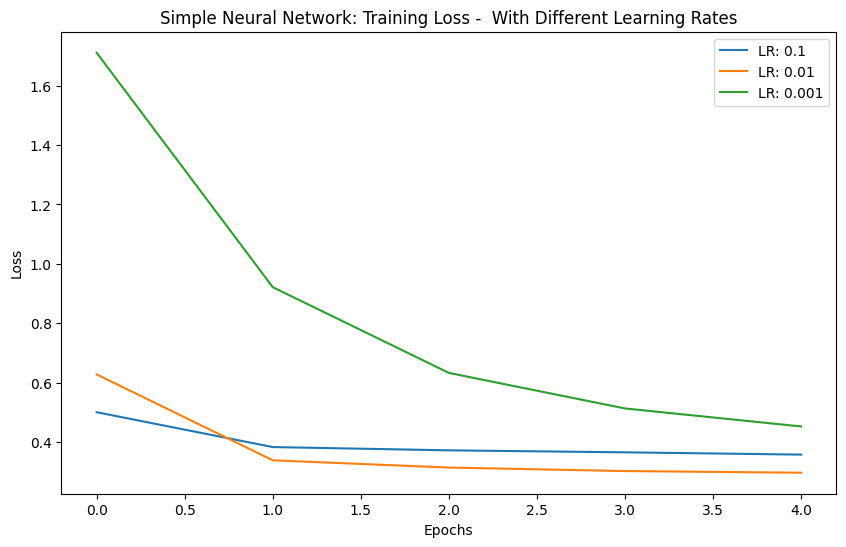

In [58]:
learning_rates = [0.1, 0.01, 0.001]
plt.figure(figsize=(10,6))

for lr in learning_rates:
  # Define the SNN
  model_simple_nn = SimpleNN()
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model_simple_nn.parameters(), lr=lr)

  # Train and Eval SNN
  print(f"Training with learning rate: {lr}")
  train_loss = train_model(model_simple_nn, trainloader, criterion, optimizer, epochs=5)
  accuracy = evaluate_model(model_simple_nn, testloader)

  # Plot Training Loss for SNN
  plt.plot(train_loss, label=f"LR: {lr}")

plt.title('Simple Neural Network: Training Loss -  With Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Expirimenting with Different Number of Epochs

Training for [5, 10, 15] epochs
Epoch 1, Loss: 0.6479991594274839
Epoch 2, Loss: 0.3505800652394692
Epoch 3, Loss: 0.31858269232312836
Epoch 4, Loss: 0.3059488600114981
Epoch 5, Loss: 0.29787511747876805
Accuracy of the network on the 1000 test images: 92.06%
Training for [5, 10, 15] epochs
Epoch 1, Loss: 0.6822408326427142
Epoch 2, Loss: 0.3509935497760773
Epoch 3, Loss: 0.3232512832204501
Epoch 4, Loss: 0.3090105123877525
Epoch 5, Loss: 0.3004842021952073
Epoch 6, Loss: 0.29406756606698037
Epoch 7, Loss: 0.28998050814469656
Epoch 8, Loss: 0.28643004563450813
Epoch 9, Loss: 0.2842085411111514
Epoch 10, Loss: 0.28070732471644877
Accuracy of the network on the 1000 test images: 91.74%
Training for [5, 10, 15] epochs
Epoch 1, Loss: 0.6513675954182943
Epoch 2, Loss: 0.3447124840180079
Epoch 3, Loss: 0.317705455327034
Epoch 4, Loss: 0.3060660078585148
Epoch 5, Loss: 0.29829087784985703
Epoch 6, Loss: 0.29307364620963733
Epoch 7, Loss: 0.28811688558359944
Epoch 8, Loss: 0.28554686985413236


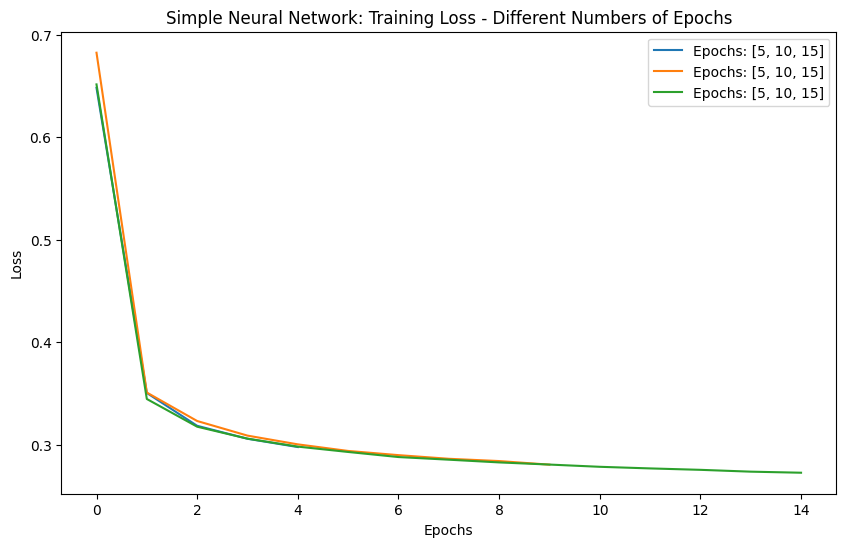

In [59]:
epochs = [5, 10, 15]
plt.figure(figsize=(10, 6))

for epoch in epochs:
    model_simple_nn = SimpleNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model_simple_nn.parameters(), lr=0.01)  # You can choose an appropriate learning rate

    print(f"Training for {epochs} epochs")
    train_loss = train_model(model_simple_nn, trainloader, criterion, optimizer, epochs=epoch)
    evaluate_model(model_simple_nn, testloader)

    # Plot the training loss for each epoch setting
    plt.plot(train_loss, label=f"Epochs: {epochs}")

plt.title('Simple Neural Network: Training Loss - Different Numbers of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Modified Simple Neural Network with ReLU

#### Expirimenting with Different Learning Rates

Training with learning rate: 0.5
Epoch 1, Loss: 2.3056307825724285
Epoch 2, Loss: 2.304574603144328
Epoch 3, Loss: 2.30455235786438
Epoch 4, Loss: 2.3047558661142986
Epoch 5, Loss: 2.30500808245341
Accuracy of the network on the 1000 test images: 10.09%
Training with learning rate: 0.1
Epoch 1, Loss: 0.7193963202754656
Epoch 2, Loss: 0.411684728962183
Epoch 3, Loss: 0.32601192275732754
Epoch 4, Loss: 0.295205913712581
Epoch 5, Loss: 0.27821869866251947
Accuracy of the network on the 1000 test images: 89.72%
Training with learning rate: 0.01
Epoch 1, Loss: 0.8304118451515834
Epoch 2, Loss: 0.3618024966875712
Epoch 3, Loss: 0.3143076359013716
Epoch 4, Loss: 0.2861922036300103
Epoch 5, Loss: 0.2639622836560011
Accuracy of the network on the 1000 test images: 93.08%


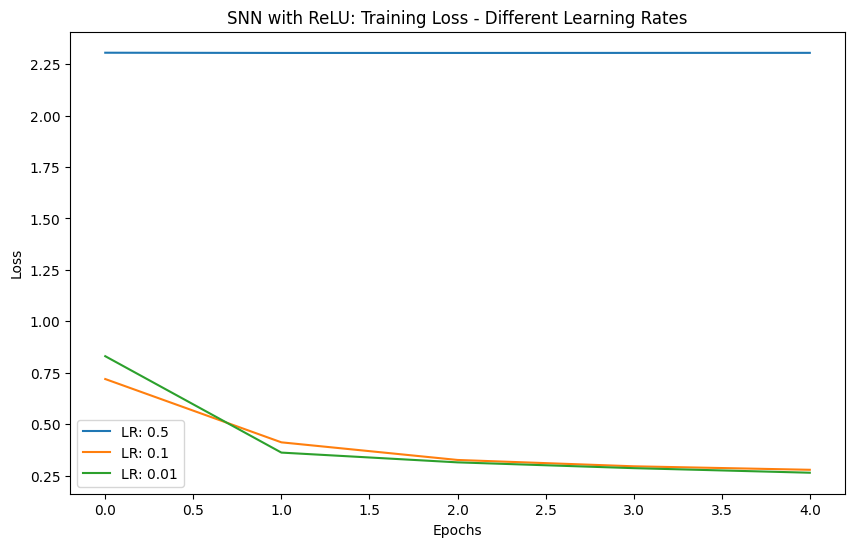

In [60]:
learning_rates = [0.5, 0.1, 0.01]
plt.figure(figsize=(10, 6))

for lr in learning_rates:
  # Define the Modified SNN
  model_modified_snn = ModifiedSNN()
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model_modified_snn.parameters(), lr=lr)

  # Train and Eval Modified SNN
  print(f"Training with learning rate: {lr}")
  train_loss = train_model(model_modified_snn, trainloader, criterion, optimizer, epochs=5)
  accuracy = evaluate_model(model_modified_snn, testloader)

  # Plot Training Loss for Modified SNN
  plt.plot(train_loss, label=f"LR: {lr}")

plt.title('SNN with ReLU: Training Loss - Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Expirimenting with Different Number of Epochs

Training for [5, 10, 15] epochs
Epoch 1, Loss: 0.5636320517659187
Epoch 2, Loss: 0.32220492103298504
Epoch 3, Loss: 0.28236372674355903
Epoch 4, Loss: 0.25965245682994526
Epoch 5, Loss: 0.2493824404090643
Accuracy of the network on the 1000 test images: 92.6%
Training for [5, 10, 15] epochs
Epoch 1, Loss: 0.5852456884165604
Epoch 2, Loss: 0.3331396175533533
Epoch 3, Loss: 0.304342114841938
Epoch 4, Loss: 0.28850736444741487
Epoch 5, Loss: 0.2780006648674607
Epoch 6, Loss: 0.2681153286481897
Epoch 7, Loss: 0.2545767135947943
Epoch 8, Loss: 0.24811072699427605
Epoch 9, Loss: 0.23941646750867368
Epoch 10, Loss: 0.23639115549574297
Accuracy of the network on the 1000 test images: 93.96%
Training for [5, 10, 15] epochs
Epoch 1, Loss: 0.5819740774671237
Epoch 2, Loss: 0.3111533971796433
Epoch 3, Loss: 0.27506040079693
Epoch 4, Loss: 0.257730800507466
Epoch 5, Loss: 0.24622358577450115
Epoch 6, Loss: 0.2397677893559138
Epoch 7, Loss: 0.23341061622848114
Epoch 8, Loss: 0.22925528042117754
Epoc

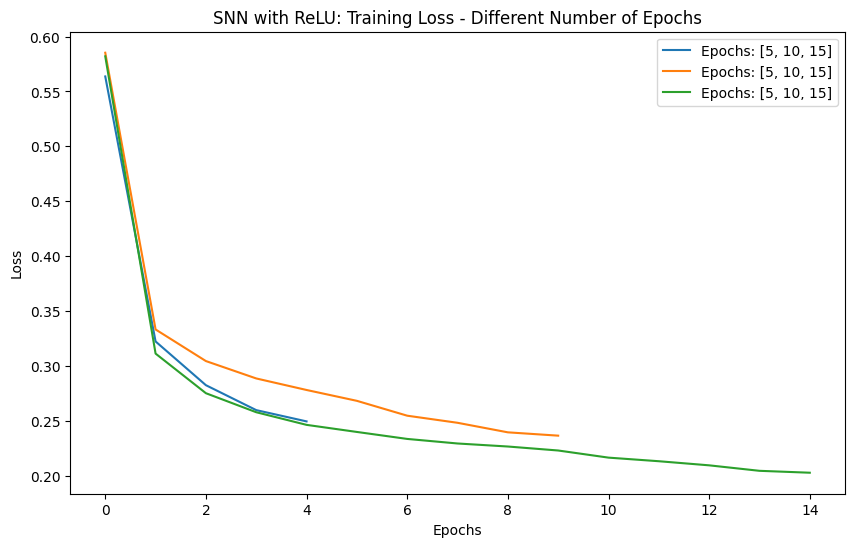

In [61]:
epochs = [5, 10, 15]
plt.figure(figsize=(10, 6))

for epoch in epochs:
  # Define the Modified SNN
  model_modified_snn = ModifiedSNN()
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model_modified_snn.parameters(), lr=0.1)

  # Train and Eval Modified SNN
  print(f"Training for {epochs} epochs")
  train_loss = train_model(model_modified_snn, trainloader, criterion, optimizer, epochs=epoch)
  accuracy = evaluate_model(model_modified_snn, testloader)

  # Plot Training Loss for Modified SNN
  plt.plot(train_loss, label=f"Epochs: {epochs}")

plt.title('SNN with ReLU: Training Loss - Different Number of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Deep Neural Network

#### Expirimenting with Different Learning Rates

Training with learning rate: 0.5
Epoch 1, Loss: 2.1614221858978273
Epoch 2, Loss: 2.3047704917907716
Epoch 3, Loss: 2.3044594440460204
Epoch 4, Loss: 2.305172313817342
Epoch 5, Loss: 2.3049763703664143
Accuracy of the network on the 1000 test images: 11.35%
Training with learning rate: 0.1
Epoch 1, Loss: 0.47153989744583763
Epoch 2, Loss: 0.16176083359320959
Epoch 3, Loss: 0.11476422198880463
Epoch 4, Loss: 0.08733201945498585
Epoch 5, Loss: 0.07452523113209754
Accuracy of the network on the 1000 test images: 96.96%
Training with learning rate: 0.01
Epoch 1, Loss: 1.2587077039559682
Epoch 2, Loss: 0.35953668599327404
Epoch 3, Loss: 0.25829398646155993
Epoch 4, Loss: 0.195697064229846
Epoch 5, Loss: 0.15710658757090568
Accuracy of the network on the 1000 test images: 95.78%


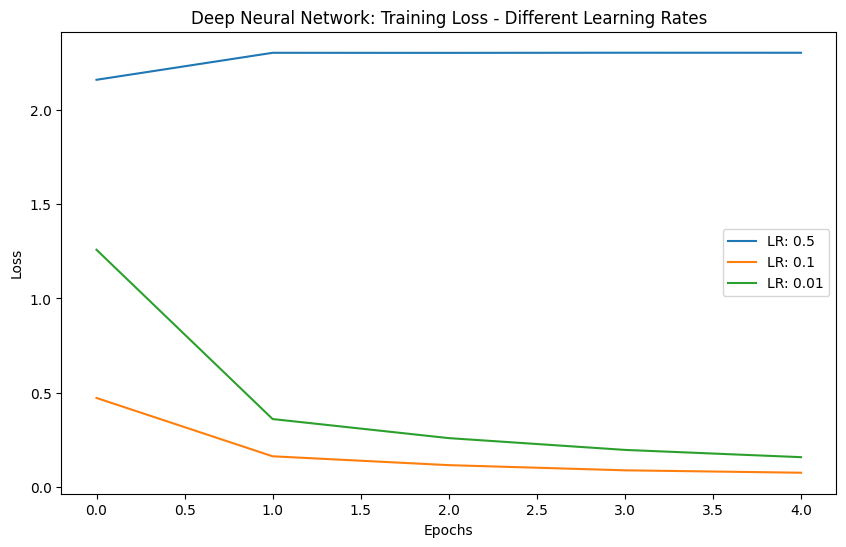

In [62]:
learning_rates = [0.5, 0.1, 0.01]
plt.figure(figsize=(10, 6))

for lr in learning_rates:
  # Define the DNN
  model_deep_nn = DeepNN()
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model_deep_nn.parameters(), lr=lr)

  # Train and Eval DNN
  print(f"Training with learning rate: {lr}")
  train_loss = train_model(model_deep_nn, trainloader, criterion, optimizer, epochs=5)
  accuracy = evaluate_model(model_deep_nn, testloader)

  # Plot Training Loss for DNN
  plt.plot(train_loss, label=f"LR: {lr}")

plt.title('Deep Neural Network: Training Loss - Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Expirimenting with Different Number of Epochs

Training for 5 epochs
Epoch 1, Loss: 0.5105226355204979
Epoch 2, Loss: 0.16562944917206962
Epoch 3, Loss: 0.11996531188773613
Epoch 4, Loss: 0.09284787115768219
Epoch 5, Loss: 0.07526364173968322
Accuracy of the network on the 1000 test images: 96.84%
Training for 10 epochs
Epoch 1, Loss: 0.48088363927503425
Epoch 2, Loss: 0.16003186443634332
Epoch 3, Loss: 0.11520117744170129
Epoch 4, Loss: 0.09292154837998871
Epoch 5, Loss: 0.0738698089545903
Epoch 6, Loss: 0.06275062191459971
Epoch 7, Loss: 0.0541253874710761
Epoch 8, Loss: 0.04783542114235461
Epoch 9, Loss: 0.03915010224649062
Epoch 10, Loss: 0.03621104012725603
Accuracy of the network on the 1000 test images: 97.75%
Training for 15 epochs
Epoch 1, Loss: 0.48826088826358316
Epoch 2, Loss: 0.16052581385994952
Epoch 3, Loss: 0.11763596467878669
Epoch 4, Loss: 0.09248074721513937
Epoch 5, Loss: 0.07482570078705127
Epoch 6, Loss: 0.06498470325235588
Epoch 7, Loss: 0.05520648166139921
Epoch 8, Loss: 0.048493757271696816
Epoch 9, Loss: 0

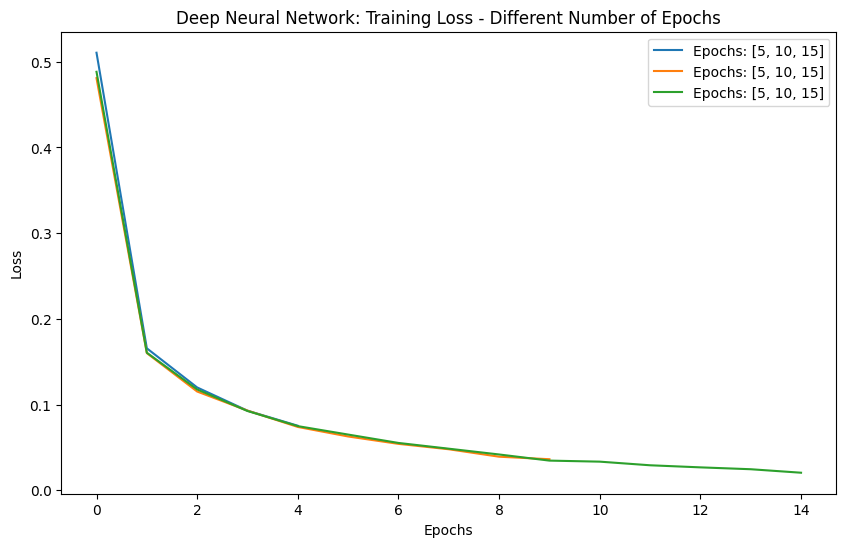

In [66]:
epochs = [5, 10, 15]
plt.figure(figsize=(10, 6))

for epoch in epochs:
  # Define the DNN
  model_deep_nn = DeepNN()
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model_deep_nn.parameters(), lr=0.1)

  # Train and Eval DNN
  print(f"Training for {epoch} epochs")
  train_loss = train_model(model_deep_nn, trainloader, criterion, optimizer, epochs=epoch)
  accuracy = evaluate_model(model_deep_nn, testloader)

  # Plot Training Loss for DNN
  plt.plot(train_loss, label=f"Epochs: {epochs}")

plt.title('Deep Neural Network: Training Loss - Different Number of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Basic Convolutional Neural Network

Training with learning rate: 0.5
Epoch 1, Loss: 2.0786232410602974
Epoch 2, Loss: 1.879053510387052
Epoch 3, Loss: 1.811447064691984
Epoch 4, Loss: 1.7905486469763026
Epoch 5, Loss: 1.7650846202481807
Accuracy of the network on the 1000 test images: 36.68%
Training with learning rate: 0.1
Epoch 1, Loss: 1.6575944540367933
Epoch 2, Loss: 1.3231199186960245
Epoch 3, Loss: 1.2128717330733096
Epoch 4, Loss: 1.1409492889658732
Epoch 5, Loss: 1.0939753986823582
Accuracy of the network on the 1000 test images: 58.43%
Training with learning rate: 0.01
Epoch 1, Loss: 2.102066568129351
Epoch 2, Loss: 1.7290964415648467
Epoch 3, Loss: 1.5225577852471242
Epoch 4, Loss: 1.4202999242284096
Epoch 5, Loss: 1.3462160805517942
Accuracy of the network on the 1000 test images: 52.29%


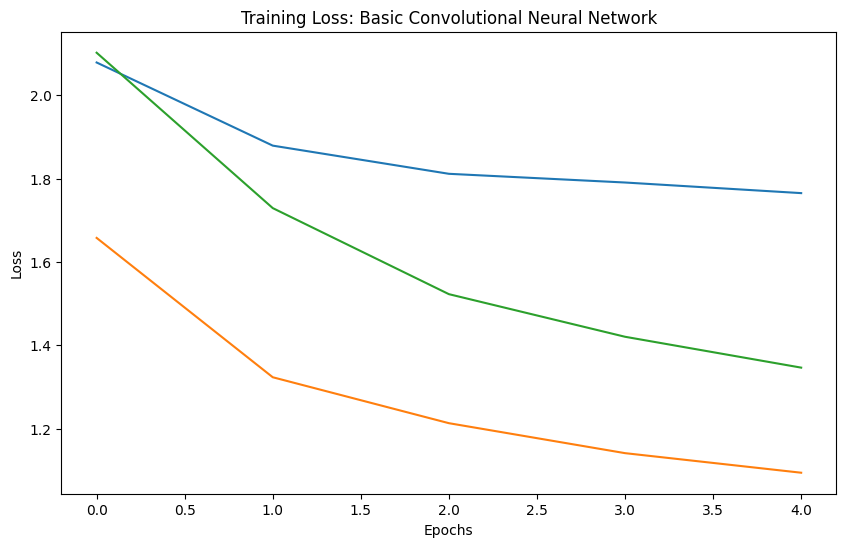

In [21]:
learning_rates = [0.5, 0.1, 0.01]
plt.figure(figsize=(10, 6))

for lr in learning_rates:
  # Define the Basic CNN
  model_basic_cnn = BasicCNN()
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model_basic_cnn.parameters(), lr=lr)

  # Train and Eval Basic CNN
  print(f"Training with learning rate: {lr}")
  train_loss = train_model(model_basic_cnn, trainloader_cifar, criterion, optimizer, epochs=5)
  accuracy = evaluate_model(model_basic_cnn, testloader_cifar)

  # Plot Training Loss for Basic CNN
  plt.plot(train_loss, label=f"LR: {lr}")

plt.title('Training Loss: Basic Convolutional Neural Network')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## Comments:


With a learning rate of 0.5, we notice that the Loss over time is way too high consistently through all 5 epochs as well as its very low accuracy of 36%. Looking at the learning rate of 0.1, it seems to be the most accurate model (58%) with the better rate of Loss indicating that this was the better learning rate of the models. Again with the learning rate of 0.01, we notice a drop off again in accuracy and a steeper drop off in the Loss in our graph.

### Modified CNN

Epoch 1, Loss: 1.5302654983748707
Epoch 2, Loss: 1.0995446378347284
Epoch 3, Loss: 0.9357580886921361
Epoch 4, Loss: 0.814332567284066
Epoch 5, Loss: 0.7155351217023395
Epoch 6, Loss: 0.6340063866787969
Epoch 7, Loss: 0.5581978344795266
Epoch 8, Loss: 0.49333088209117293
Epoch 9, Loss: 0.4436893758202545
Epoch 10, Loss: 0.3942891036256223
Accuracy of the network on the 1000 test images: 67.71%
Epoch 1, Loss: 1.5179370617302121
Epoch 2, Loss: 1.1101638088223267
Epoch 3, Loss: 0.931188082340354
Epoch 4, Loss: 0.8091807990065005
Epoch 5, Loss: 0.7085169998503463
Epoch 6, Loss: 0.6249919767877038
Epoch 7, Loss: 0.5493204197771872
Epoch 8, Loss: 0.4872380578300546
Epoch 9, Loss: 0.4411119104685382
Epoch 10, Loss: 0.40158776359981785
Epoch 11, Loss: 0.35510374155903734
Epoch 12, Loss: 0.33032824917293024
Epoch 13, Loss: 0.31215847338658836
Epoch 14, Loss: 0.2900498516590085
Epoch 15, Loss: 0.28749259615642325
Epoch 16, Loss: 0.26936062275993944
Epoch 17, Loss: 0.25953571437616724
Epoch 18, L

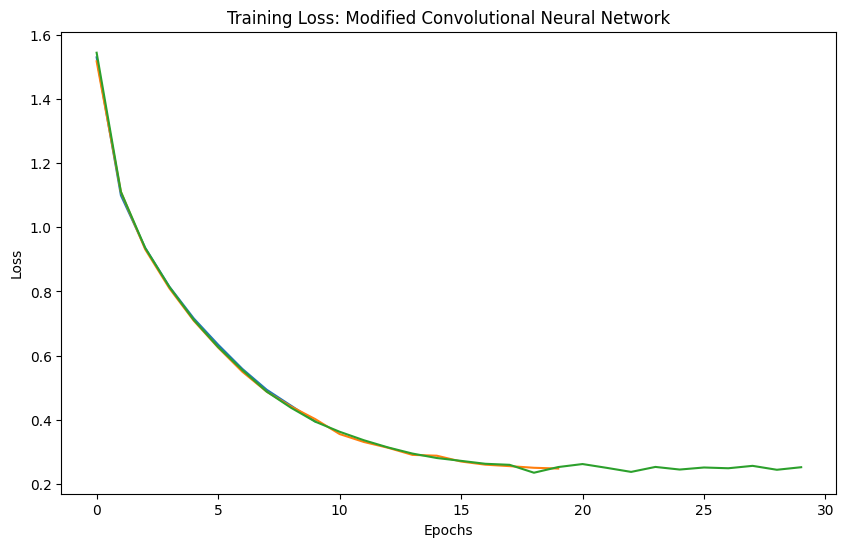

In [22]:
epochs = [10, 20, 30]
plt.figure(figsize=(10, 6))

for epoch in epochs:
  # Define the Modified CNN
  model_modified_cnn = ModifiedCNN()
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model_modified_cnn.parameters(), lr=0.1)

  # Train and Eval Modified CNN
  train_loss = train_model(model_modified_cnn, trainloader_cifar, criterion, optimizer, epochs=epoch)
  accuracy = evaluate_model(model_modified_cnn, testloader_cifar)

  # Plot Training Loss for Modified CNN
  plt.plot(train_loss, label=f"Epochs: {epochs}")

plt.title('Training Loss: Modified Convolutional Neural Network')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## Comments:


Although the change in the number of Epochs increases by 10 every round, we can notice that the loss for each (indicated by the graph) is almost the same for every test. It should be noted that there is indeed a decrease in the accuracy of the training by about 2-3% for each increase in Epochs.

### Visualize our Samples

In [23]:
import random

def visualize_model_samples(model, testloader, classes, num_images=5):
    model.eval()
    images, labels = next(iter(testloader))

    # Randomly select indices for visualization
    indices = random.sample(range(len(images)), num_images)

    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    plt.figure(figsize=(10, 10))
    for i, idx in enumerate(indices):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[idx][0], cmap="gray")
        plt.title(f'Pred: {classes[predicted[idx]]}\nTrue: {classes[labels[idx]]}')
        plt.axis('off')
    plt.show()

# Define the class labels for MNIST
classes = [str(i) for i in range(10)]


#### Simple Neural Network:

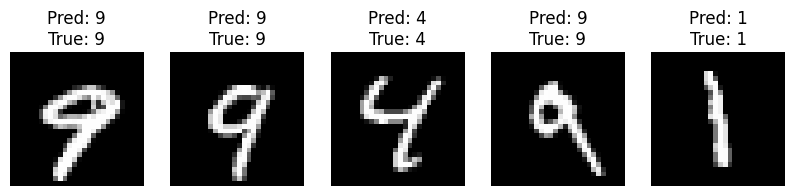

In [51]:
visualize_model_samples(model_simple_nn, testloader, classes)

#### Simple Neural Network with ReLU

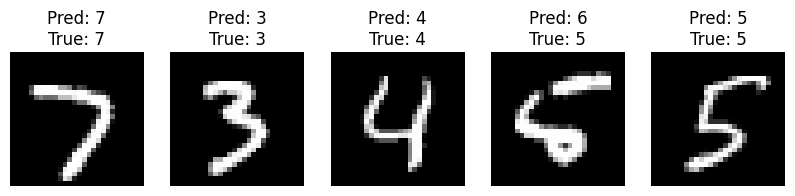

In [49]:
visualize_model_samples(model_modified_snn, testloader, classes)

#### Deep Neural Network

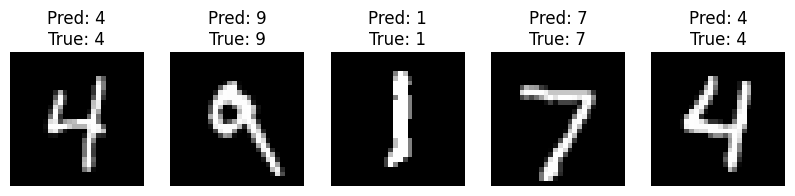

In [46]:
visualize_model_samples(model_deep_nn, testloader, classes)

#### Basic Convolutional Neural Network

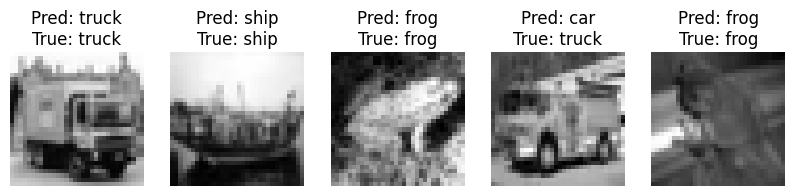

In [24]:
visualize_model_samples(model_basic_cnn, testloader_cifar, classes_cifar)

#### Modified Convolutional Neural Network

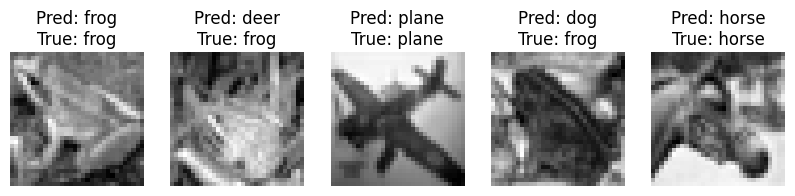

In [25]:
visualize_model_samples(model_modified_cnn, testloader_cifar, classes_cifar)

# Overall Observations:

### Part 1:
In my work with neural networks, I observed the significant impact of learning rates. For the Simple Neural Network (SNN), a learning rate of 0.1 swiftly brought the accuracy to 90.75%, while lowering it to 0.01 nudged the accuracy up to 91.57%. The smallest rate of 0.001 slowed learning, resulting in an 88.14% accuracy. Intriguingly, increasing the number of training epochs from 5 to 15 showed a consistent improvement in accuracy, emphasizing the value of extended training periods. Incorporating ReLU activation into the SNN markedly enhanced its performance, boosting the accuracy up to 93.08%, which underscores the effectiveness of activation functions in improving model learning dynamics. For the Deep Neural Network (DNN), a higher learning rate of 0.5 wasn't as effective, achieving only 11.35% accuracy. However, reducing the rate to 0.1 significantly enhanced performance, with an impressive accuracy of 96.96%, demonstrating the critical balance between learning rate and model complexity.

### Part 2:
In exploring Convolutional Neural Networks with the CIFAR-10 dataset, I found that lower learning rates (0.1 and 0.01) were more effective for the Basic CNN model, with the best accuracy reaching 58.43%. The higher rate of 0.5 led to a noticeably lower accuracy. For the Modified CNN, as I increased the filter sizes, the network required more epochs to adapt to the dataset's complexity. However, contrary to expectations, extending the training from 10 to 30 epochs did not improve performance; instead, there was a slight decrease in accuracy by 2-3% every 10 epochs. This result was a crucial reminder of the delicate interplay between model complexity and training duration, highlighting that more training isn't always synonymous with better performance.